In [119]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as a_s
from sklearn.model_selection import KFold

In [375]:
data = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv", low_memory=False)

In [18]:
len(data)

15620

In [6]:
data.columns[:24]

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter',
       'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName',
       'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventBootcamp', 'CodeEventCoffee',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam',
       'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup',
       'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther',
       'CodeEventRailsBridge', 'CodeEventRailsGirls'],
      dtype='object')

In [7]:
data.columns[24:]

Index(['CodeEventStartUpWknd', 'CodeEventWomenCode', 'CodeEventWorkshop',
       'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField',
       'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther',
       'ExpectedEarning', 'FinanciallySupporting', 'Gender', 'HasChildren',
       'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet',
       'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt',
       'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income',
       'IsEthnicMinority', 'IsReceiveDiabilitiesBenefits', 'IsSoftwareDev',
       'IsUnderEmployed', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobRoleInterestOther', 'JobWherePref',
       'LanguageAtHome', 'MaritalStatus', 'MoneyForLearning',
       'MonthsProgramming', 'NetworkID', 'Part1EndTime', 'Part1StartTime',
       'Part2EndTime', 'Part2StartTime', 'PodcastChangeLog',
       'PodcastCodeNewbie', 'PodcastCodingBlocks', 'PodcastDeveloperTea',
       'Pod

In [10]:
len(data.AttendedBootcamp[data.AttendedBootcamp == True])

953

In [129]:
def gender_to_number(x):
    if x.Gender == 'male':
        return 1
    elif x.Gender == 'female':
        return 0

In [184]:
data.CityPopulation.unique()

array(['between 100,000 and 1 million', 'more than 1 million',
       'less than 100,000', nan], dtype=object)

In [185]:
def city_to_number(x):
    if x.CityPopulation == 'less than 100,000':
        return 1
    elif x.CityPopulation == 'between 100,000 and 1 million':
        return 2
    elif x.CityPopulation == 'more than 1 million':
        return 3

In [380]:
data["gender_num"] = [gender_to_number(data.loc[i]) for i in range(len(data))]

In [186]:
data["city_size"] = [city_to_number(data.loc[i]) for i in range(len(data))]

In [187]:
print(len(data[data.city_size == 1]))
print(len(data[data.city_size == 2]))
print(len(data[data.city_size == 3]))

3155
4917
5558


In [190]:
data_gender = data[(data["Gender"] == 'male') | (data["Gender"] == 'female')]
len(data1)

7129

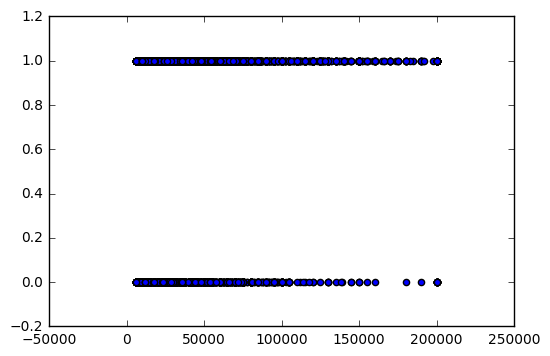

In [192]:
data1 = data_gender[["gender_num", "Income", "MonthsProgramming", "city_size"]].dropna()
len(data1)

x = data1.Income
y = data1.gender_num
plt.scatter(x, y)
plt.show()

4191


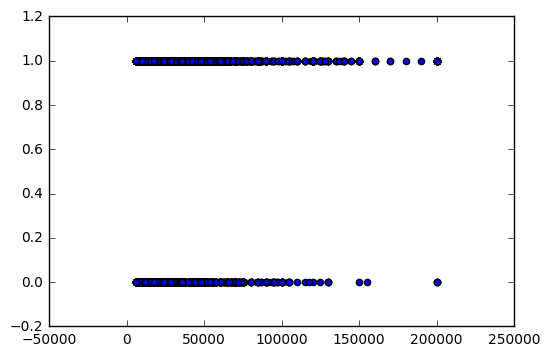

In [153]:
data_month_prog_less_36 = data1[data1.MonthsProgramming <= 12]
print(len(data_month_prog_less_36))

x = data_month_prog_less_36.Income
y = data_month_prog_less_36.gender_num
plt.scatter(x, y)
plt.show()

4191


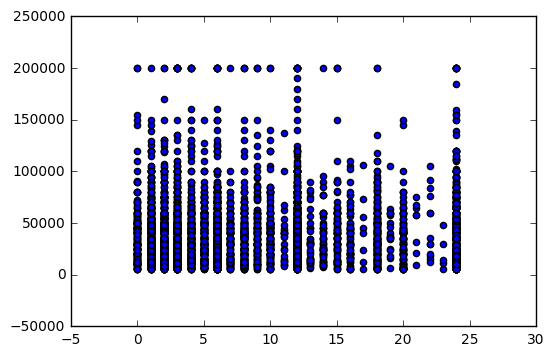

In [156]:
data_month = data1[data1.MonthsProgramming <= 24]
print(len(data_month_prog_less_36))
x = data_month.MonthsProgramming
y = data_month.Income
plt.scatter(x, y)
plt.show()

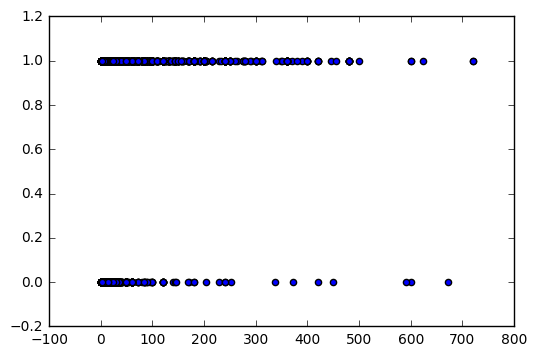

In [196]:


x = data1.MonthsProgramming
y = data1.gender_num
plt.scatter(x, y)
plt.show()

In [47]:
data.BootcampFullJobAfter.unique()

array([ nan,   0.,   1.])

In [193]:
len(data.BootcampFullJobAfter[(data.BootcampFullJobAfter == 1.0) | (data.BootcampFullJobAfter == 0.0)])

635

In [52]:
len(data.BootcampMonthsAgo[data.BootcampMonthsAgo > 0])

602

In [53]:
data.JobApplyWhen.unique()

array([nan, 'Within the next 6 months', "I haven't decided",
       "I'm already applying", 'more than 12 months from now',
       'Within 7 to 12 months'], dtype=object)

In [54]:
data.EmploymentStatus.unique()

array(['Employed for wages', 'Self-employed freelancer',
       'Self-employed business owner',
       'Not working and not looking for work',
       'Not working but looking for work', 'Doing an unpaid internship',
       'A stay-at-home parent or homemaker', nan, 'Military',
       'Unable to work', 'Retired'], dtype=object)

In [63]:
data.BootcampFinish.unique()

array([ nan,   1.,   0.])

In [64]:
len(data.BootcampFinish[(data.BootcampFinish == 1.0) | (data.BootcampFinish == 0.0)])

933

In [70]:
len(data.BootcampPostSalary[data.BootcampPostSalary > 0])

330

In [78]:
data3 = data[["CityPopulation", "BootcampFullJobAfter"]].dropna()

In [88]:
#x = data3.CityPopulation
#y = data3.BootcampPostSalary
#plt.scatter(x, y)
#plt.show()

In [109]:
data4 = data[["Gender", "Income"]].dropna()

In [93]:
len(data4)

7288

In [110]:
data.Gender.unique()

array(['male', 'female', nan, 'genderqueer', 'agender', 'trans'], dtype=object)

In [111]:
data4_1 = data4[data4["Gender"] == 'male']

In [112]:
len(data4_1)

5815

In [113]:
data4_0 = data4[data4["Gender"] == 'female']

In [114]:
len(data4_0)

1429

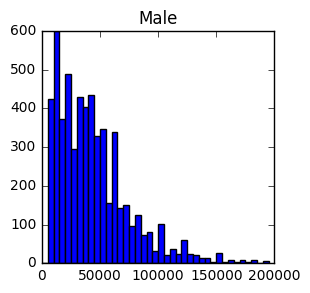

In [115]:
plt.figure(figsize=(3, 3))
plt.hist(data4_1.Income, bins=np.arange(0, 200000, 5000))
plt.title("Male")
plt.show()

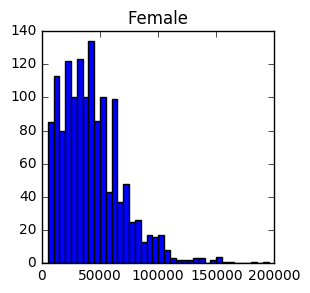

In [116]:
plt.figure(figsize=(3, 3))
plt.hist(data4_0.Income, bins=np.arange(0, 200000, 5000))
plt.title("Female")
plt.show()

In [117]:
data4_1.describe()

,Income
count,5815.000000
mean,45520.715391
std,36918.883898
min,6000.000000
25%,20000.000000
50%,36000.000000
75%,60000.000000
max,200000.000000


In [118]:
data4_0.describe()

,Income
count,1429.000000
mean,42982.739678
std,29822.084583
min,6000.000000
25%,22800.000000
50%,38000.000000
75%,56000.000000
max,200000.000000


In [120]:
tstat, pval = ttest_ind(data4_1.Income, data4_0.Income, equal_var=False)
print(tstat, pval)

2.7419435239 0.00614926735042


In [157]:
data.SchoolDegree.unique()

array(['some college credit, no degree',
       'high school diploma or equivalent (GED)', "bachelor's degree",
       "master's degree (non-professional)",
       'professional degree (MBA, MD, JD, etc.)',
       'trade, technical, or vocational training', "associate's degree",
       'some high school', nan, 'Ph.D.',
       'no high school (secondary school)'], dtype=object)

In [175]:
data_dev = data[["MonthsProgramming", "IsSoftwareDev", "gender_num"]].dropna()

In [182]:
len(data_dev[(data_dev.IsSoftwareDev == 1.0) & (data.MonthsProgramming < 6)& (data.gender_num == 1)])

248

In [181]:
len(data_dev[data_dev.MonthsProgramming < 12])

7019

In [209]:
a = len(data[(data.CodeEventMeetup == 1) & (data.AttendedBootcamp == 1)])
b = len(data[(data.CodeEventMeetup == 1)]) 
a / b


0.134185303514377

In [210]:
a = len(data[(data.CodeEventMeetup == 1) & (data.AttendedBootcamp == 0)])
b = len(data[data.CodeEventMeetup == 1])
a / b

0.865814696485623

In [211]:
events = []
for col in data.columns:
    if col.startswith("CodeEvent"):
        events.append(col)

In [214]:
print(events, len(events))

['CodeEventBootcamp', 'CodeEventCoffee', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWomenCode', 'CodeEventWorkshop'] 16


In [225]:
data_events = data[events]

In [227]:
def attend_events(x):
    if x.any() == 1:
        return 1
    else:
        return 0

In [239]:
event_column = [attend_events(data_events.loc[i]) for i in range(len(data_events))]

In [241]:
event_column.count(1)

14736

In [245]:
len(data_events)

15620

In [247]:
data["attend_events"] = event_column

In [252]:
fem_event = data[data.Gender == 'female']

fem_attend_event = len(fem_event[fem_event.attend_events == 1]) / len(fem_event)
print(fem_attend_event)

0.9387323943661972


In [254]:
male_event = data[data.Gender == 'male']

male_attend_event = len(male_event[male_event.attend_events == 1]) / len(male_event)
print(male_attend_event)

0.9483559353520342


In [259]:
bc_all = data[["AttendedBootcamp", "attend_events"]].dropna()
bc_all = bc_all.reset_index(drop=True)
bc_event = bc_all[data.AttendedBootcamp == 1]
bc_attend_event = len(bc_event[bc_event.attend_events == 1]) / len(bc_event)
print(bc_attend_event)

0.9468085106382979


/Users/tatianaphillips/cf/501/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


### 4% of men attended bc, and 11% of women

### country live vs gender

In [364]:
gender_all = data[["CountryLive", "gender_num"]].dropna()
gender_all = gender_all.reset_index(drop=True)
gender_men = gender_all[gender_all.gender_num == 1]
men_usa = len(gender_men[gender_men.CountryLive == "United States of America"]) / len(gender_men)
print(men_usa)

0.41127741692553893


In [366]:
gender_fem = gender_all[gender_all.gender_num == 0]
fem_usa = len(gender_fem[gender_fem.CountryLive == "United States of America"]) / len(gender_fem)
print(fem_usa)

0.6362986780993212


### age vs gender

In [292]:
gender_al = data[["CodeEventMeetup", "gender_num"]].dropna()
gender_al = gender_al.reset_index(drop=True)
gender_men = gender_al[gender_al.gender_num == 1]
men_attend_bc = len(gender_men[gender_men.CodeEventMeetup == 1]) / len(gender_men)
print(men_attend_bc)

1.0


In [293]:
len(data[data.CodeEventMeetup == 1])

313

In [272]:
data_city = data[data.gender_num == 0]
city_attend_event = len(data_city[data_city.AttendedBootcamp == 1]) / len(data_city)
print(city_attend_event)

0.1147887323943662


In [269]:
data_city = data[data.city_size == 2]
city_attend_event = len(data_city[data_city.gender_num == 0]) / len(data_city)
print(city_attend_event)

0.2167988610941631


In [267]:
data_city = data[data.city_size == 3]
city_attend_event = len(data_city[data_city.gender_num == 1]) / len(data_city)
print(city_attend_event)

0.7867938107232818


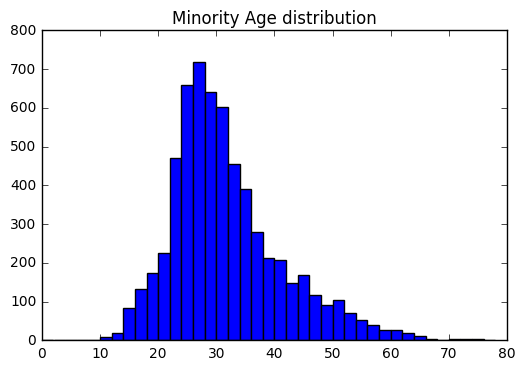

In [323]:
bins=np.arange(0, 80, 2)
data_gen_ag = data[data.CountryLive == "United States of America"]
plt.hist(data_gen_ag.Age.dropna(), bins=bins)
plt.title('USA Age distribution')
plt.show()

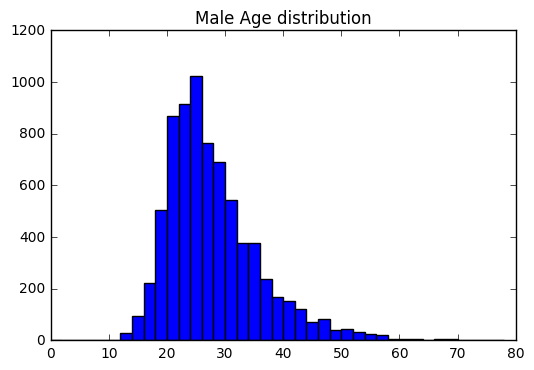

In [324]:
data_gen_ag = data[data.Gender == "male"]
data_gen_ag = data[data.CountryLive != "United States of America"]
plt.hist(data_gen_ag.Age.dropna(), bins=bins)
plt.title('Male Age distribution')
plt.show()

In [334]:
data_cleaned = data[["Age", "CountryLive", "gender_num"]].dropna()
data_cleaned = data_cleaned.reset_index(drop=True)

In [335]:
def classify_country(x):
    """Create 2 classes from CountryLive, USA = 1, not USA = 0"""
    if x.CountryLive == "United States of America":
        return 1
    else:
        return 0

data_cleaned["country_num"] = [classify_country(data_cleaned.loc[i]) for i in range(len(data_cleaned))]

### All ages

In [363]:
scaler = MinMaxScaler()

data_cleaned["age_scaled"] = scaler.fit_transform(data_cleaned.Age.reshape(-1, 1))
data_cleaned["country_scaled"] = scaler.fit_transform(data_cleaned.country_num.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(
    data_cleaned[["country_scaled"]],
    data_cleaned.gender_num,
    test_size=0.33
)

clf = KN(n_neighbors=4)

clf.fit(x_train, y_train)

y_model = clf.predict(x_test)

a_s(y_test, y_model)

/Users/tatianaphillips/cf/501/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


0.79612314709236032

### Cross Validation

In [345]:
kf = KFold(n_splits=5, shuffle=True)

kf.get_n_splits(data_cleaned)

for train_index, test_index in kf.split(data_cleaned):
    clf = KN(n_neighbors=34)
    X_train = data_cleaned[["country_scaled"]].loc[train_index]
    X_test = data_cleaned[["country_scaled"]].loc[test_index]

    y_train = data_cleaned.gender_num.loc[train_index]
    y_test = data_cleaned.gender_num.loc[test_index]
    clf.fit(X_train, y_train)
    y_model = clf.predict(X_test)
    print("accuracy: ", a_s(y_test, y_model))

accuracy:  0.789691497366
accuracy:  0.810688746707
accuracy:  0.781708694016
accuracy:  0.797515995484
accuracy:  0.787730523146


### Ages < 20

In [401]:
scaler = MinMaxScaler()
data_cleaned_30 = data_cleaned[data_cleaned.Age < 20]
data_cleaned_30["age_scaled"] = scaler.fit_transform(data_cleaned_30.Age.reshape(-1, 1))
data_cleaned_30["country_scaled"] = scaler.fit_transform(data_cleaned_30.country_num.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(
    data_cleaned_30[["age_scaled"]],
    data_cleaned_30.gender_num,
    test_size=0.33
)

clf = KN(n_neighbors=4)

clf.fit(x_train, y_train)

y_model = clf.predict(x_test)

a_s(y_test, y_model)

/Users/tatianaphillips/cf/501/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/tatianaphillips/cf/501/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/tatianaphillips/cf/501/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.87562189054726369

In [390]:
data_cleaned_inc = data[["Age", "Income", "gender_num", "CountryLive"]].dropna()
data_cleaned_inc = data_cleaned_inc.reset_index(drop=True)

In [391]:
def classify_country(x):
    """Create 2 classes from CountryLive, USA = 1, not USA = 0"""
    if x.CountryLive == "United States of America":
        return 1
    else:
        return 0

data_cleaned_inc["country_num"] = [classify_country(data_cleaned_inc.loc[i]) for i in range(len(data_cleaned_inc))]

In [392]:
data_cleaned_inc.columns

Index(['Age', 'Income', 'gender_num', 'CountryLive', 'country_num'], dtype='object')

In [403]:
scaler = MinMaxScaler()
data_cleaned_inc["age_scaled"] = scaler.fit_transform(data_cleaned_inc.Age.reshape(-1, 1))
data_cleaned_inc["income_scaled"] = scaler.fit_transform(data_cleaned_inc.Income.reshape(-1, 1))
data_cleaned_inc["country_scaled"] = scaler.fit_transform(data_cleaned_inc.country_num.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(
    data_cleaned_inc[["age_scaled"]],
    data_cleaned_inc.gender_num,
    test_size=0.33
)

clf = KN(n_neighbors=4)

clf.fit(x_train, y_train)

y_model = clf.predict(x_test)

a_s(y_test, y_model)

/Users/tatianaphillips/cf/501/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


0.6530181511186155